In [16]:
# Stworzenie trzech prostszych sieci w oparciu o LSTM
# Autor: Rafał Klinowski
import numpy as np
from keras.models import Sequential
from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, LSTM, Embedding, Dropout
import os
import matplotlib.pyplot as plt

# Wczytanie tekstu i konwersja na małe litery

# Ballady
files = os.listdir("data/ballads")
ballads = ""
for file in files:
    with open("data/ballads/" + file, 'r', encoding="utf-8") as f:
        ballads += f.read().lower()

# Dziady
files = os.listdir("data/forefathers")
forefathers = ""
for file in files:
    with open("data/forefathers/" + file, 'r', encoding="utf-8") as f:
        forefathers += f.read().lower()

# Pan Tadeusz
with open("data/thaddeus/pan-tadeusz.txt", 'r', encoding="utf-8") as f:
    pan_tadeusz = f.read().lower()

(6561, 60) (6561, 3707)
Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.0205 - loss: 7.8997
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.0194 - loss: 7.2996
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.0270 - loss: 7.0683
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.0362 - loss: 6.8187
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.0459 - loss: 6.4982
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.0471 - loss: 6.1060
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.0630 - loss: 5.6365
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.0795 - loss: 5.1567
Epoch 9/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.1338 - loss: 4.6735
Epoch 10/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.1862 - loss: 4.2390
Epoch 11/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.2579 - loss: 3.8599
Epoch 12/20
206/

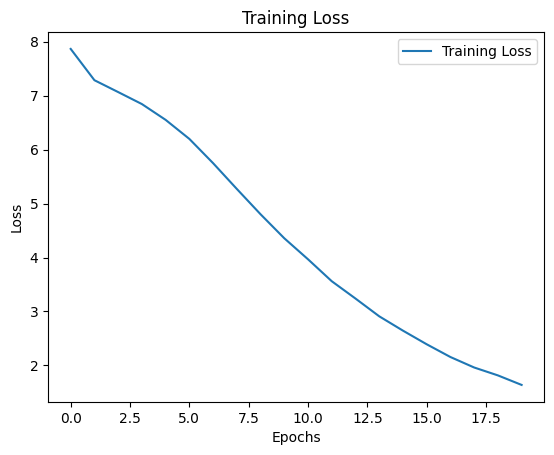

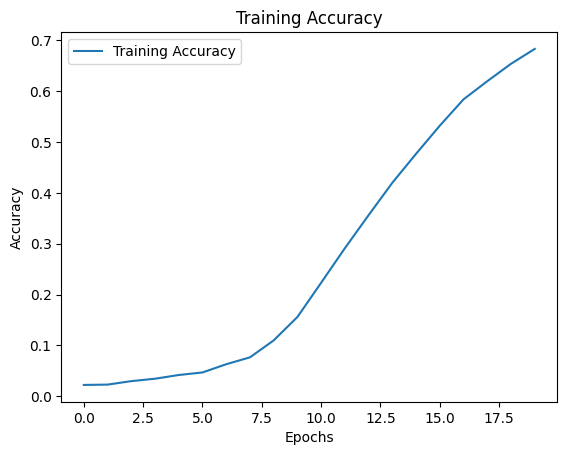

In [20]:
# Utworzenie pierwszej sieci - "Ballady i Romanse"
tokenizer = Tokenizer()
tokenizer.fit_on_texts([ballads])
total_words = len(tokenizer.word_index) + 1

# Stworzenie sekwencji wejściowych
input_sequences = []
for line in ballads.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Upewnienie się, że wszystkie sekwencje mają taką samą długość
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

# Stworzenie wejścia i wyjścia
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

print(X.shape, y.shape)

# Stworzenie modelu
model_ballads = Sequential()
model_ballads.add(Embedding(total_words, 100))
model_ballads.add(LSTM(256))
model_ballads.add(Dense(total_words, activation="softmax"))

model_ballads.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Trenowanie modelu
history = model_ballads.fit(X, y, epochs=20)

# Wykresy
# Training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Zapisanie modelu
model_ballads.save("models/mickiewicz_ballads.keras")

(26181, 154) (26181, 9669)
Epoch 1/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - accuracy: 0.0291 - loss: 8.3358
Epoch 2/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.0362 - loss: 7.5632
Epoch 3/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step - accuracy: 0.0456 - loss: 7.1449
Epoch 4/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.0563 - loss: 6.6357
Epoch 5/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 85s 104ms/step - accuracy: 0.0707 - loss: 6.0737
Epoch 6/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step - accuracy: 0.1005 - loss: 5.4295
Epoch 7/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 85s 104ms/step - accuracy: 0.1584 - loss: 4.7935
Epoch 8/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 86s 105ms/step - accuracy: 0.2421 - loss: 4.1714
Epoch 9/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 86s 105ms/step - accuracy: 0.3355 - loss: 3.6076
Epoch 10/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 85s 104ms/step - accuracy: 0.4162 - loss: 3.1629
Epoch 11/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 86s 105ms/step - accuracy: 0.4963 - loss:

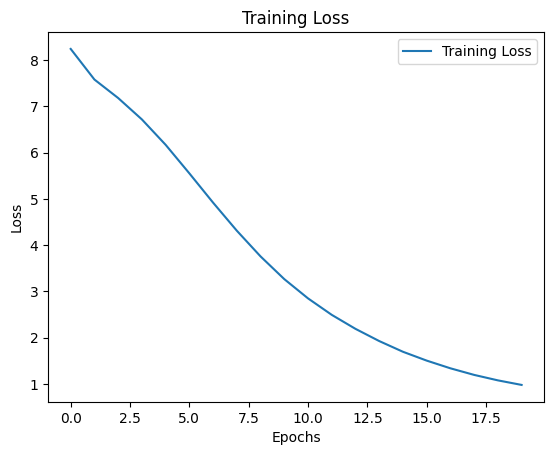

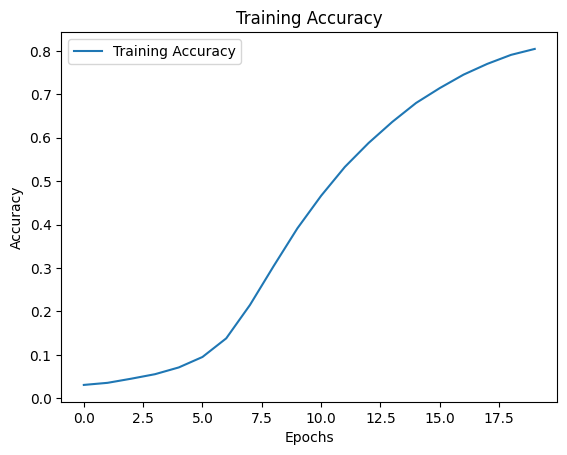

In [21]:
# Utworzenie drugiej sieci - "Dziady"
tokenizer = Tokenizer()
tokenizer.fit_on_texts([forefathers])
total_words = len(tokenizer.word_index) + 1

# Stworzenie sekwencji wejściowych
input_sequences = []
for line in forefathers.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Upewnienie się, że wszystkie sekwencje mają taką samą długość
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

# Stworzenie wejścia i wyjścia
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

print(X.shape, y.shape)

# Stworzenie modelu
model_forefathers = Sequential()
model_forefathers.add(Embedding(total_words, 100))
model_forefathers.add(LSTM(256))
model_forefathers.add(Dense(total_words, activation="softmax"))

model_forefathers.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Trenowanie modelu
history = model_forefathers.fit(X, y, epochs=20)

# Wykresy
# Training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Zapisanie modelu
model_forefathers.save("models/mickiewicz_forefathers.keras")

(59285, 74) (59285, 19229)
Epoch 1/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 120s 65ms/step - accuracy: 0.0250 - loss: 8.7741
Epoch 2/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 122s 66ms/step - accuracy: 0.0371 - loss: 7.9595
Epoch 3/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 123s 66ms/step - accuracy: 0.0492 - loss: 7.4476
Epoch 4/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 120s 65ms/step - accuracy: 0.0591 - loss: 6.7645
Epoch 5/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 122s 66ms/step - accuracy: 0.0886 - loss: 5.8822
Epoch 6/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 118s 64ms/step - accuracy: 0.1783 - loss: 4.8918
Epoch 7/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 119s 64ms/step - accuracy: 0.3208 - loss: 3.9538
Epoch 8/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 123s 66ms/step - accuracy: 0.4455 - loss: 3.1418
Epoch 9/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 122s 66ms/step - accuracy: 0.5422 - loss: 2.5668
Epoch 10/10
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 125s 67ms/step - accuracy: 0.6222 - loss: 2.1047


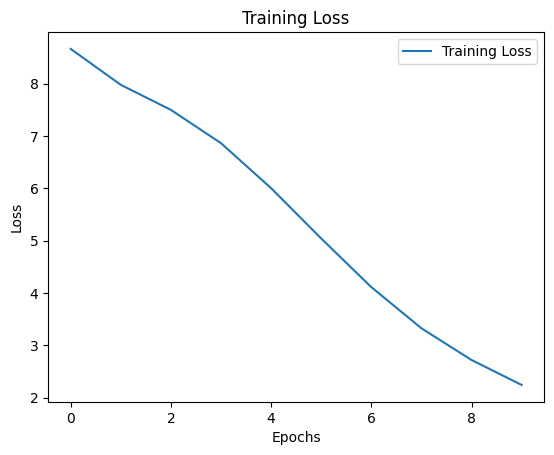

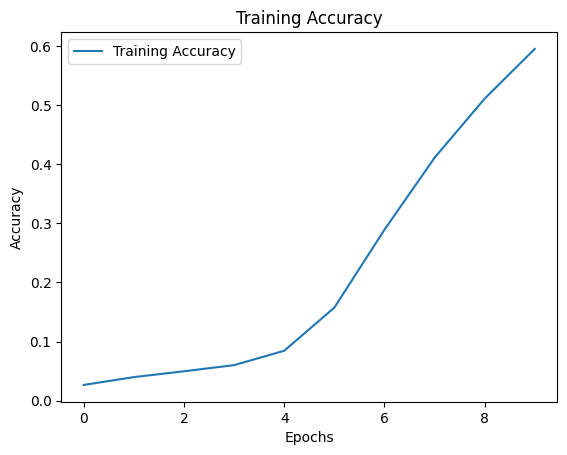

In [23]:
# Utworzenie trzeciej sieci - "Pan Tadeusz"
tokenizer = Tokenizer()
tokenizer.fit_on_texts([pan_tadeusz])
total_words = len(tokenizer.word_index) + 1

# Stworzenie sekwencji wejściowych
input_sequences = []
for line in pan_tadeusz.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Upewnienie się, że wszystkie sekwencje mają taką samą długość
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

# Stworzenie wejścia i wyjścia
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

print(X.shape, y.shape)

# Stworzenie modelu
model_tadeusz = Sequential()
model_tadeusz.add(Embedding(total_words, 100))
model_tadeusz.add(LSTM(256))
model_tadeusz.add(Dense(total_words, activation="softmax"))

model_tadeusz.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Trenowanie modelu
history = model_tadeusz.fit(X, y, epochs=10)

# Wykresy
# Training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Zapisanie modelu
model_tadeusz.save("models/mickiewicz_pan_tadeusz.keras")